## <b>Understanding Feedforward Neural Network</b>

In this assignment, you are required to build 3 Feedforward Neural Networks(FNNs) to simulate function
<br> $y = 7x_1^3 - x_2 \cdot x_1^2 \cdot \frac {1-e^{(x_1+1)x_2}}{1-e^{x_2+1}} $
<br> in range x1: +-10, x2: +-10
<br> You need to have a different structure for each model you build.

##Requirements

1 You are required to finish each part below following instructions.
<br>2 You may work on native py files, but your work needs to include same documentation. You may use pytorch or tensorflow keras.
<br>3 You may work in a group of 3.

<br><b>For submission, submit a link to your github repo</b>
<br>Each student in the group must all submit.

#### Part 1 data preparation

In the cell below, generate training data for your model.
<br> In the interval of x1: +-10, x2: +-10, generate 1000 data for x1 and 1000 data for x2.
<br>All data need to be separated by the same distance.

<br>That is, you need to generate one value for y for every 0.02 differences in x1 or x2,
<br>and have a total of 1000000 data in your training dataset.

In [ ]:
import numpy as np


# Generate 1000 datapoints for x1 and x2
x1 = np.arange(-10, 10, 0.02).astype(np.longdouble)
x2 = np.arange(-10, 10, 0.02).astype(np.longdouble)

# Generate all combinations of x1 and x2 (1000 x 1000 = 1000000)
x1, x2 = np.meshgrid(x1, x2)

# Flatten the arrays to get 1D arrays for x1 and x2
x1 = x1.flatten().round(3)
x2 = x2.flatten().round(3)

# Calculate the y values from the given function
t1 = 7.0 * x1**3
t2 = x2 * x1**2
t3_numerator = 1.0 - (np.exp((x1 + 1.0) * x2))
t3_denominator = 1.0 - (np.exp(x2 + 1.0))
t3 = t3_numerator / t3_denominator

y = t1 - t2 * t3

# Apply logarithmic transformation (Helps the model train better)
# Unfortunately, the transformation/inverse transformation does not handle values in range (-1,1) well
y = np.sign(y) * np.log(np.abs(y))

# Removes NaN and Inf values
mask = np.logical_not(np.isnan(y))
x1 = x1[mask]
x2 = x2[mask]
y = y[mask]
mask = np.logical_not(np.isinf(y))
x1 = x1[mask]
x2 = x2[mask]
y = y[mask]

# Show details
print(x1.shape, x2.shape)
print(x1[np.argmin(y)], x1[np.argmin(y)], y.min())
print(x1[np.argmax(y)], x2[np.argmax(y)], y.max())
print(y.shape)

(998001,) (998001,)
9.98 9.98 -105.50216631021281182
-10.0 -0.98 17.306612810053214042
(998001,)


<ipython-input-5-5ec3d9b16a67>:20: RuntimeWarning: divide by zero encountered in divide
  t3 = t3_numerator / t3_denominator
<ipython-input-5-5ec3d9b16a67>:20: RuntimeWarning: invalid value encountered in divide
  t3 = t3_numerator / t3_denominator
<ipython-input-5-5ec3d9b16a67>:22: RuntimeWarning: invalid value encountered in multiply
  y = t1 - t2 * t3
<ipython-input-5-5ec3d9b16a67>:26: RuntimeWarning: divide by zero encountered in log
  y = np.sign(y) * np.log(np.abs(y))
<ipython-input-5-5ec3d9b16a67>:26: RuntimeWarning: invalid value encountered in multiply
  y = np.sign(y) * np.log(np.abs(y))


#### Part 2 build models

In the cells below, build your models and train it with data from part1.
<br>You need to split your training data to two parts. With 40% used in training, and 60% used in test.

<br>You may do this with sklearn's train_test_split() or keras' validation_split together with train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X = np.column_stack([x1, x2])
Y = y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.6, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizes target values
Y_scaler = StandardScaler()
Y_train = Y_scaler.fit_transform(Y_train.reshape(-1, 1)).astype(np.longdouble)
Y_test = Y_scaler.transform(Y_test.reshape(-1, 1)).astype(np.longdouble)

In [ ]:
# model 1

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(2))
model.add(tf.keras.layers.Dense(32, activation="linear"))
model.add(tf.keras.layers.Dense(32, activation="linear"))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
model.summary()

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
Y_pred = model.predict(X_test).astype(np.longdouble)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1185 (4.63 KB)
Trainable params: 1185 (4.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
9980/9980 [==============================] - 32s 3ms/step - loss: 0.9808 - mse: 0.9808 - val_loss: 0.9578 - val_mse: 0.9578
Epoch 2/10
9980/9980 [==============================] - 40s 4ms/step - loss: 0.9608 - mse: 0.9608 - val_loss: 0.9540 - val_mse: 0.9540
Epoch 3/10
9980/

In [ ]:
# model 2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(2))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
model.summary()

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
Y_pred = model.predict(X_test).astype(np.longdouble)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                96        
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
9980/9980 [==============================] - 33s 3ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 2/10
9980/998

In [ ]:
# model 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(2))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(32, activation="leaky_relu"))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mse"])
model.summary()

model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
Y_pred = model.predict(X_test).astype(np.longdouble)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                192       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7521 (29.38 KB)
Trainable params: 7521 (29.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
9980/9980

#### Part 3 model evaluation

In the cells below, eval your model with training data, test data ( with model.evaluate( ) ), and plot your predict result on the same plot with the plot of goal function.

<br>If you are not sure how to do 3D plot, you may plot x1-y plane and x2-y plane separately

In [ ]:
# Evaluate the model using mode.evaluate()
results = model.evaluate(X_test, Y_test)

# Print the evaluation results
print("Test Loss:", results[0])
print("Test MSE:", results[1])

18713/18713 [==============================] - 40s 2ms/step - loss: 0.0011 - mse: 0.0011
Test Loss: 0.0010893609141930938
Test MSE: 0.0010893609141930938


In [ ]:
from sklearn.metrics import mean_squared_log_error, r2_score

# Evaluating the inverse_transformed predicted vs true values of the model
Y_test_scale = Y_scaler.inverse_transform(Y_test.reshape(-1, 1)).astype(np.longdouble)
Y_pred_scale = Y_scaler.inverse_transform(Y_pred.reshape(-1, 1)).astype(np.longdouble)

Y_test_scale = np.sign(Y_test_scale) * np.exp(np.abs(Y_test_scale))
Y_pred_scale = np.sign(Y_pred_scale) * np.exp(np.abs(Y_pred_scale))

# Evaluate using Mean Squared Log error since we are operating on an exponential output
print("MSLE: ", mean_squared_log_error(np.abs(Y_test_scale), np.abs(Y_pred_scale)))
print("R2_score: ", r2_score(Y_test_scale, Y_pred_scale))

MSLE:  0.3167823917557339267
R2_score:  0.35635908027769436


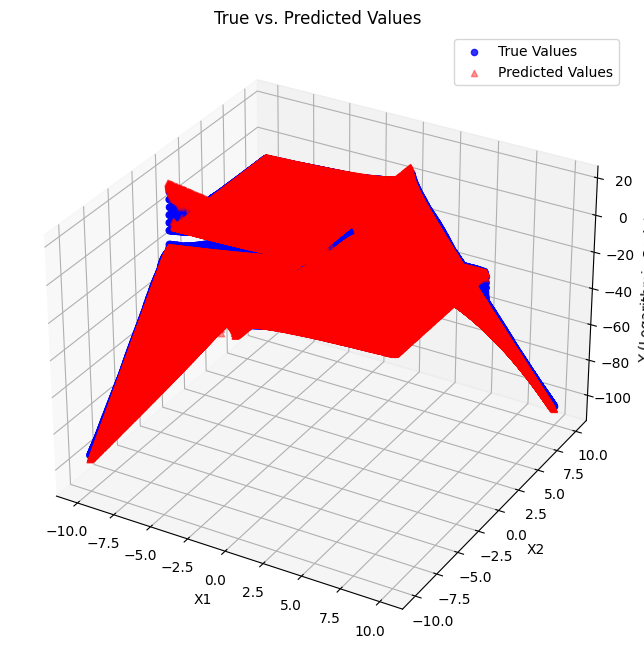

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scales Y logarithmically since the outputs are exponential
plotting_y_pred_logarithmic = np.sign(Y_pred_scale) * np.log(np.abs(Y_pred_scale))
plotting_y_test_logarithmic = np.sign(Y_test_scale) * np.log(np.abs(Y_test_scale))

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the true values
ax.scatter(X_test[:, 0].astype(np.float64), X_test[:, 1].astype(np.float64), plotting_y_pred_logarithmic.astype(np.float64), c="blue", marker="o", label="True Values", alpha=0.8)

# Plot the predicted values
ax.scatter(X_test[:, 0].astype(np.float64), X_test[:, 1].astype(np.float64), plotting_y_test_logarithmic.astype(np.float64), c="red", marker="^", label="Predicted Values", alpha=0.4)


ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y (Logarithmic Scale)")
ax.set_title("True vs. Predicted Values")
ax.legend()

plt.show()

#### Part 4 get model output and feedforward by yourself

Recall how a FNN gets its output. Now choose your model with highest accuracy, and call get_weights( ) to get its weights and bias.
<br> Hint: bias and weights have different dimensions in most cases. Try to guess which index represent bias before you look it up on the internet.

<br> Afterwards, choose 5 data from your training dataset, do all the necessary calculations (with program of course), and get the output of your model. Compare it to the model.predict( ) result.
<br> They should be identical for the first several digitals, if not for all digits.

In [ ]:
# Best model is the third model
model_weights = model.get_weights()

# Print the shapes of weights
for i, w in enumerate(model_weights):
    print(f"Weight Layer {i} - Shape: {w.shape}")

# It looks like to me that every odd layer (1, 3, 4, etc) is the bias since it is just a 1D shape
# That means that every even layer (0, 2, 4, etc) are the weights, which are 2D shapes

Weight Layer 0 - Shape: (2, 64)
Weight Layer 1 - Shape: (64,)
Weight Layer 2 - Shape: (64, 64)
Weight Layer 3 - Shape: (64,)
Weight Layer 4 - Shape: (64, 32)
Weight Layer 5 - Shape: (32,)
Weight Layer 6 - Shape: (32, 32)
Weight Layer 7 - Shape: (32,)
Weight Layer 8 - Shape: (32, 1)
Weight Layer 9 - Shape: (1,)


In [ ]:
# Sample of 5
X_test_sample = X_test[:5]
Y_pred_sample = model.predict(X_test_sample)

feed_forward_results = []
for input_data in X_test_sample:
  # First layer (2x64).T * (2x1) = (64x2) * (2x1) = (64x1)
  sigma = np.dot(model_weights[0].T, input_data) + model_weights[1]
  a = np.maximum(0, sigma)  # relu activation function

  # Second layer (64x64).T * (64x1) = (64x64) * (64x1) = (64x1)
  sigma = np.dot(model_weights[2].T, a) + model_weights[3]
  a = np.maximum(sigma * 0.2, sigma)  # leakyrelu activation function (0.2 negative slope is default)

  # Third layer (64x32).T * (64x1) = (32x64) * (64x1) = (32x1)
  sigma = np.dot(model_weights[4].T, a) + model_weights[5]
  a = np.maximum(sigma * 0.2, sigma)  # leakyrelu activation function (0.2 negative slope is default)

  # Fourth layer (32x32).T * (32x1) = (32x32) * (32x1) = (32x1)
  sigma = np.dot(model_weights[6].T, a) + model_weights[7]
  a = np.maximum(sigma * 0.2, sigma)  # leakyrelu activation function (0.2 negative slope is default)

  # Fifth layer (32x1).T * (32x1) = (1x32) * (32x1) = (1x1)
  sigma = np.dot(model_weights[8].T, a) + model_weights[9]
  feed_forward_results.append(sigma)

# Comparison
print(np.array(feed_forward_results))
print(Y_pred_sample)

1/1 [==============================] - 0s 50ms/step
[[0.7542243 ]
 [0.65673472]
 [0.24064325]
 [0.29936847]
 [0.56916122]]
[[0.75422424]
 [0.65673465]
 [0.24064298]
 [0.29936844]
 [0.5691612 ]]
